# DS-SF-36 | Unit Project | 1 | Research Design | Starter Code

In this first unit project, you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: The outcome is to predict which free-tier customers will convert to paying customers with yes or no.

> ### Question 2.  What are the predictors/covariates?

Answer: The preditors are age, gender, location, profession, days since last log in, activity score.

> ### Question 3.  What timeframe is this data relevent for?

Answer: From January - April 2015.

> ### Question 4.  What is the hypothesis?

Answer: The hypothesis is that demographics data collected at signup, along with customer usage data, will successfully predict whether a free-tier customer will convert to paying customer. 

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [2]:
import os
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [2]:
df.prestige.unique()

array([  3.,   1.,   4.,   2.,  nan])

In [4]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

> ### Question 5.  Create a data dictionary.

Answer: 

We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

Answer: The outcome is a prediction admission into UCLA, where 1=admitted, and 0=not admitted.

> ### Question 7.  What are the predictors/covariates?

Answer: The predictors are gre, gpa, and prestige.

> ### Question 8.  What timeframe is this data relevent for?

Answer: The data does not have specific timeframe.

> ### Question 9.  What is the hypothesis?

Answer: The hypothesis is that knowing a student's gre, gpa and prestige status, we can predict whether he/she is admitted to UCLA.

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: Predict which student will be admitted to UCLA, using his GRE score, GPA, and prestige ranking.  We can't determine the timeframe of this data because there is no data field in the dataset.

## Part C.  Create an exploratory analysis plan by answering the following questions:

> ### Question 11. What are the goals of the exploratory analysis?

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

Answer: The goal of the exploratory analysis are: 
    1) to assess the quality of the data.  This can include both incorrect data & missing data.
    2) to understand basic relationships among the variables.  This can include analyzing relationship between independent variables as well as between independent and dependent variables.
    3) help visualize the data.

> ### Question 12.  What are the assumptions of the distribution of data?

Answer: GRE and GPA are assumed to be normally distributed.  Admit follows binomial distribution.  Prestige is discrete.

> ### Question 13.  How will determine the distribution of your data?

Answer: We can test if gre and gap follow normal distribution by using QQ plot.  GRE and GPA are both mostly normal, but skew heavily towards the right.  You can see this both in the QQ plot as well as the histogram.

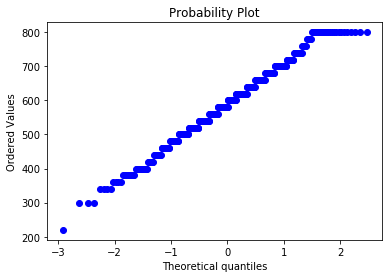

In [28]:
import scipy.stats as stats
import pylab 

stats.probplot(df.gre, dist="norm",plot=pylab)
pylab.show()

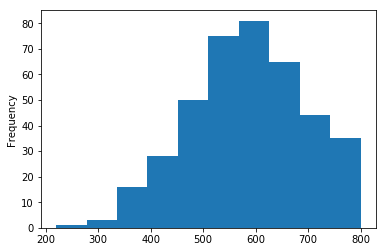

In [32]:
df['gre'].plot.hist()

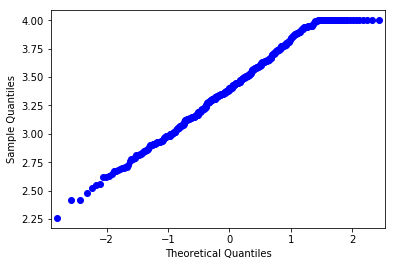

In [31]:
import statsmodels.api as sm

sm.qqplot(df.gpa, line='s')
pylab.show()

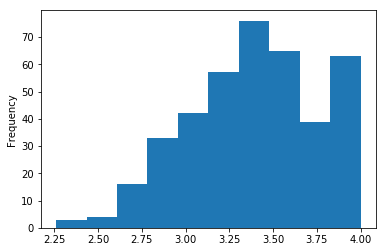

In [33]:
df['gpa'].plot.hist()

> ### Question 14.  How might outliers impact your analysis?

Answer: Regression is sensitive to outliers and the resulting equation will be very skewed.  Decision tree can handle outliers more easily due to its nonlinear nature.

> ### Question 15.  How will you test for outliers?

Answer: There are several ways to detect and define outliers.  
    1) Values outside of the 1% and 99% percentiles can be considered to be outliers.
    2) Values 1.5 interquartile ranges below the first quartile (Q1), or at least 1.5 interquartile ranges above the third quartile (Q3).
    3) Values more than 2 standard deviations away from mean can be considered to be outliers.

> ### Question 16.  What is colinearity?

Answer: Colinearity happens when two independent variables are highly correlated to each other.  The correlation matrix below shows that gre and gpa are 38% correlated.  GPA and prestige are nearly uncorrelated.

In [38]:
df.corr()
#plt.matshow(df.corr())

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


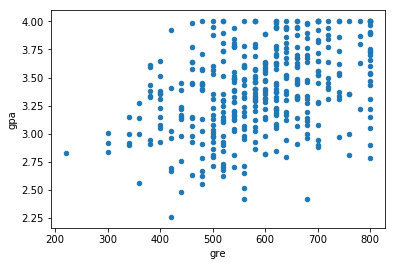

In [39]:
df.plot.scatter(x='gre',y='gpa')

> ### Question 17.  How will you test for covariance?

Answer: TODO

> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: TODO

In [8]:
df.groupby('admit').mean()

,gre,gpa,prestige
admit,,,
0,573.579336,3.345404,2.641026
1,618.897638,3.489206,2.150794


In [6]:
df.admit.value_counts()

0    273
1    127
Name: admit, dtype: int64

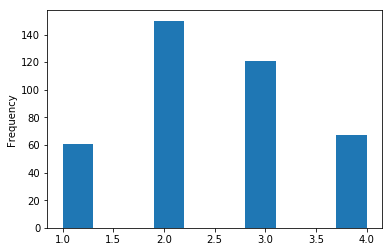

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
df['prestige'].plot.hist()
